# Results

## Contour Compatibility

### Corpus

Conser's Aeschylus: **80.2%** compatibility.

For Aristophanes: ≈ **82.0**!

In [27]:
from collections import Counter

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')
print(all_sets)

found_zero = False
number_of_variables = 0
value_distribution = {
    '0': 0,
    '1/4': 0,
    '1/3:': 0,
    '1/2': 0,
    '2/3': 0,
    '3/4': 0,
    '1': 0,
}

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                if value == 0.0:
                    found_zero = True
                
if found_zero:
    print("Found zero")
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(count_dict)


Total compatibility: 0.8205128205128205
[[[[0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0], [1.0, 0.5, 1.0, 0.5, 0.5, 1.0], [0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0], [1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0], [1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0], [0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0], [1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0], [1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0], [1.0, 1.0, 0.5

#### By Position (Sedes)

Average by position (out of 52): [0.8, 0.82, 0.83, 0.8, 0.81, 0.83, 0.82, 0.86, 0.81, 0.8, 0.82, 0.85, 0.82, 0.8, 0.88, 0.84, 0.79, 0.8, 0.83, 0.81, 0.85, 0.87, 0.78, 0.83, 0.84, 0.79, 0.83, 0.92, 0.8, 0.73, 0.88, 0.77, 0.83, 0.7, 0.8, 0.75, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5]


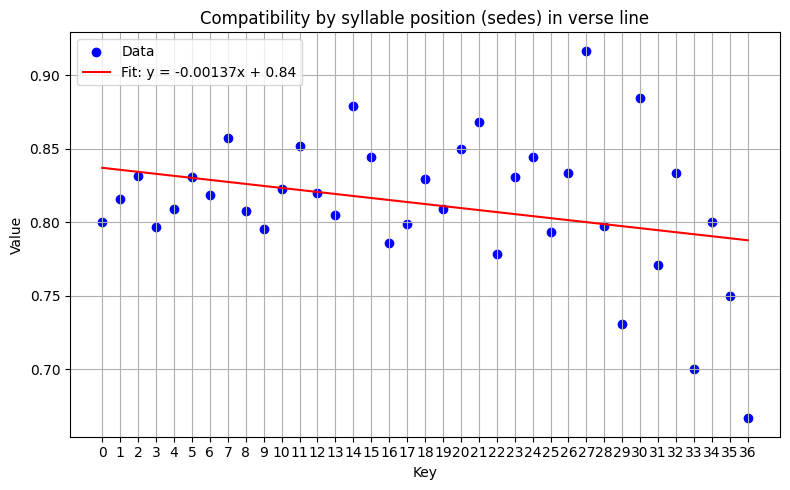

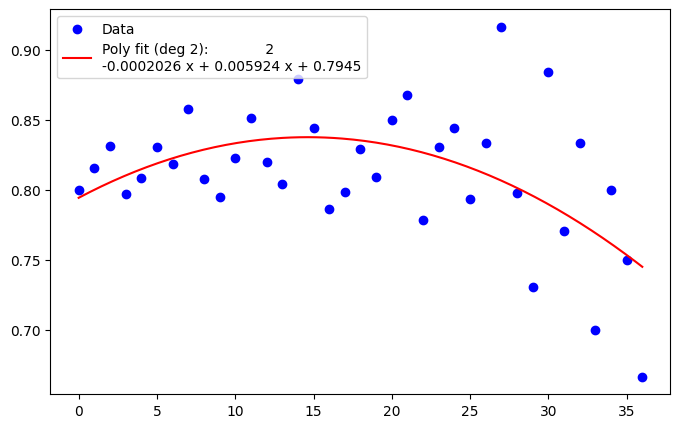

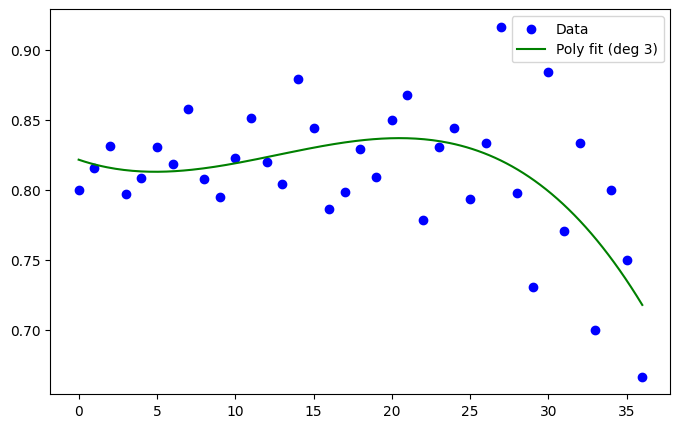

In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

def average_by_index(nested):
    # Flatten to get all innermost lists (depth 4)
    def collect_lists(x):
        if isinstance(x, list) and all(isinstance(i, (int, float)) for i in x):
            return [x]
        elif isinstance(x, list):
            result = []
            for item in x:
                result.extend(collect_lists(item))
            return result
        return []

    all_lists = collect_lists(nested)

    # Collect values per index
    sums = defaultdict(float)
    counts = defaultdict(int)

    for lst in all_lists:
        for i, val in enumerate(lst):
            sums[i] += val
            counts[i] += 1

    max_index = max(sums.keys(), default=-1)
    averages = [(sums[i] / counts[i]) if counts[i] > 0 else None for i in range(max_index + 1)]

    return averages

all_sets = compatibility_corpus('data/compiled/')

average_by_position = average_by_index(all_sets)

rounded = [round(x, 2) if x is not None else None for x in average_by_position]
print(f'Average by position (out of {len(rounded)}): {rounded}')

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = data
    labels = x

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ### Polynomial regression with numpy

    # Data
    x = np.array(x)  # ensure numpy array
    y = np.array(y)

    # Polynomial regression of degree 2 (quadratic)
    degree = 2
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    # Regression line
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = poly(x_fit)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree}): {poly}', color='red')
    plt.legend()
    plt.show()

    ### Polynomial regression with sklearn

    # Transform to polynomial features
    degree = 3
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    # Prediction
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = model.predict(x_fit[:, np.newaxis])

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree})', color='green')
    plt.legend()
    plt.show()

linear_regression_plays(average_by_position[:37], 'Compatibility by syllable position (sedes) in verse line')

### Play

	ach:	0.8179916317991632
	eq:	0.8139367816091954
	nu:	0.82
	v:	0.817450495049505
	pax:	0.82531328320802
	av:	0.817295188556567
	lys:	0.8303571428571429
	th:	0.812807881773399
	ra:	0.8106603023070803
	ec:	0.8257142857142857
	pl:	0.8900709219858156


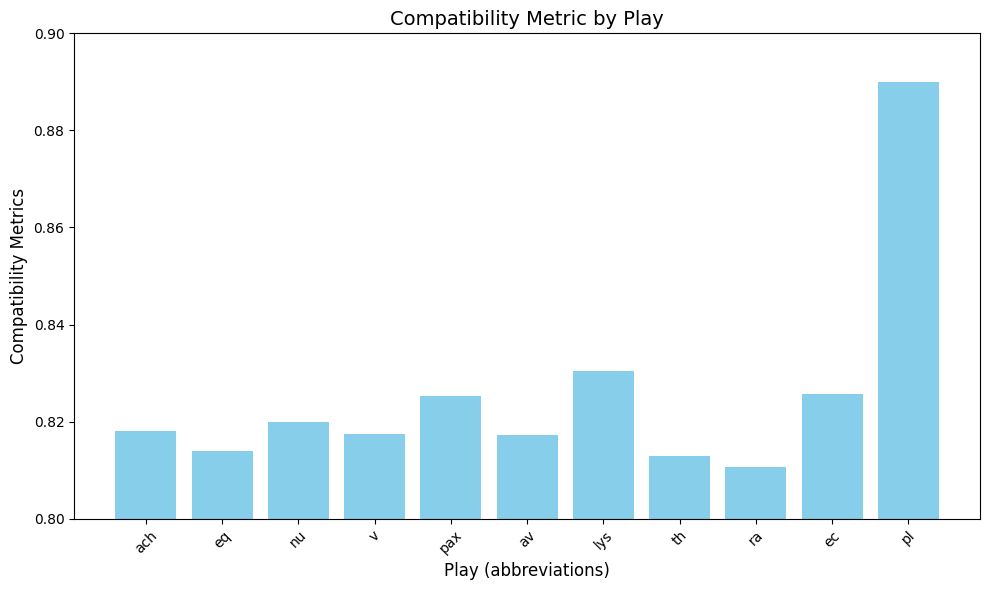

In [9]:
from src.stats_comp import compatibility_play, compatibility_ratios_to_stats
from src.plot.plot import plot_dict
from src.utils.utils import abbreviations

def prepare_compatibility_stat(abbreviation):
    list = compatibility_play(f'data/compiled/responsion_{abbreviation}_compiled.xml')
    return compatibility_ratios_to_stats(list)

play_dict = {}
for play in abbreviations:
    play_dict[play] = prepare_compatibility_stat(play)
    print(f'\t{play}:\t{play_dict[play]}')

plot_dict(play_dict, y_start=0.8, y_end=0.9)




There is a weak linear correlation, but if we exclude Plutus the slope decreases by a full order of magnitude.

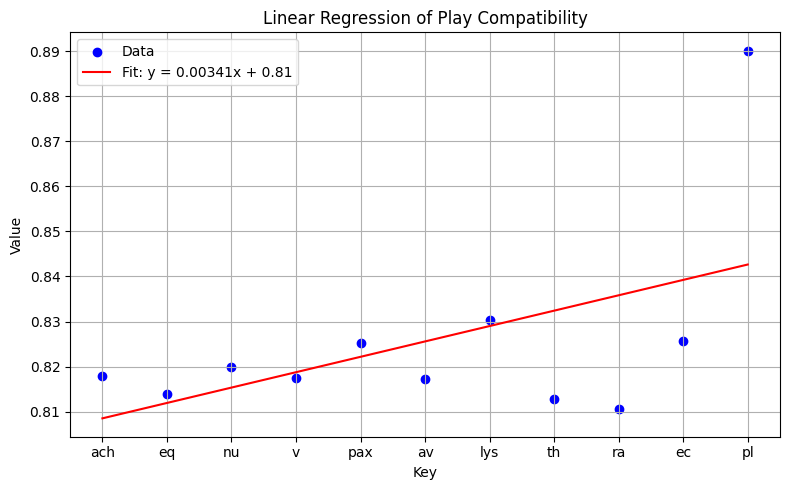

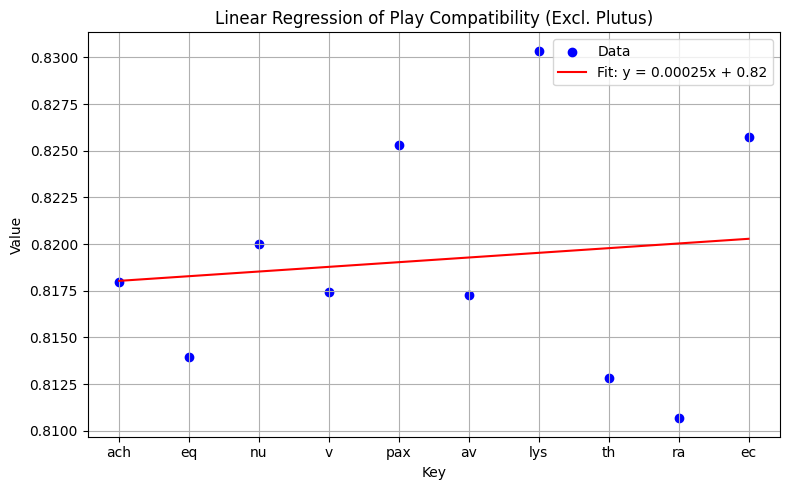

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = list(data.values())
    labels = list(data.keys())

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example dict with string keys
data = play_dict
linear_regression_plays(data, 'Linear Regression of Play Compatibility')

data = {k: v for k, v in data.items() if k != 'pl'}
linear_regression_plays(data, 'Linear Regression of Play Compatibility (Excl. Plutus)')



### Intra-Play Arcs

### Canticum

['ach01', 'ach02', 'ach03', 'ach04', 'ach05', 'ach06', 'ach07', 'ach08', 'ach09', 'eq01', 'eq02', 'eq03', 'eq04', 'eq05', 'eq06', 'eq07', 'eq08', 'nu01', 'nu02', 'nu03', 'nu04', 'nu05', 'nu06', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'pax01', 'pax02', 'pax03', 'pax04', 'pax05', 'pax06', 'av01', 'av02', 'av03', 'av04', 'av05', 'av06', 'av07', 'av08', 'av09', 'av10', 'lys01', 'lys02', 'lys03', 'lys04', 'lys05', 'lys06', 'lys07', 'lys08', 'th01', 'th02', 'th03', 'th04', 'ra01', 'ra02', 'ra03', 'ra04', 'ra05', 'ra06', 'ra07', 'ra08', 'ra09', 'ra10', 'ra11', 'ec01', 'ec02', 'ec03', 'ec04', 'ec05', 'ec06', 'pl01', 'pl02']
Number of cantica: 78


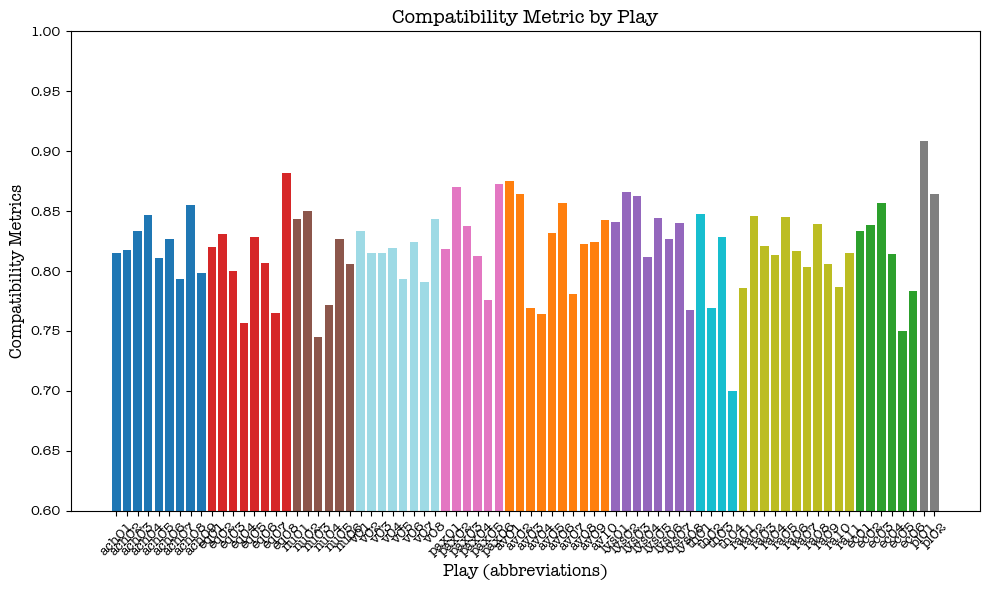

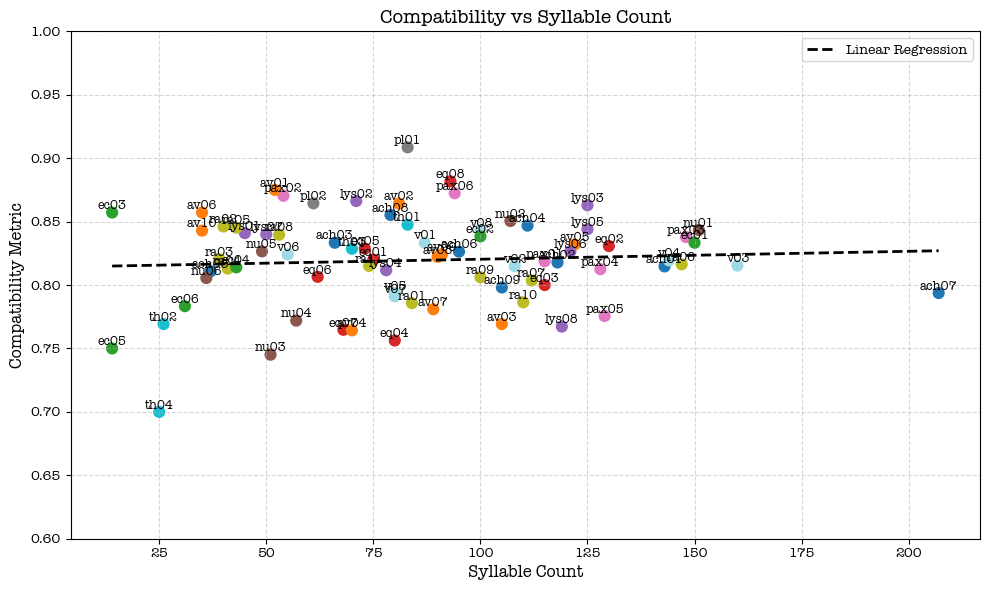

In [26]:
from src.stats_comp import compatibility_canticum, compatibility_ratios_to_stats
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

canticum_ids = get_canticum_ids(abbreviations)
print(canticum_ids)
syll_counts = get_syll_count(canticum_ids)

canticum_dict = {}
for canticum_id in canticum_ids:
    canticum_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

print("Number of cantica:", len(canticum_ids))
plot_dict(canticum_dict, y_start=0.6, y_end=1)
plot_dict_as_points(canticum_dict, syll_counts, y_start=0.6, y_end=1)




#### By Strophicity

Antistrophic compatibility: 0.8221052631578948
Polystrophic compatibility: 0.7975912975912975


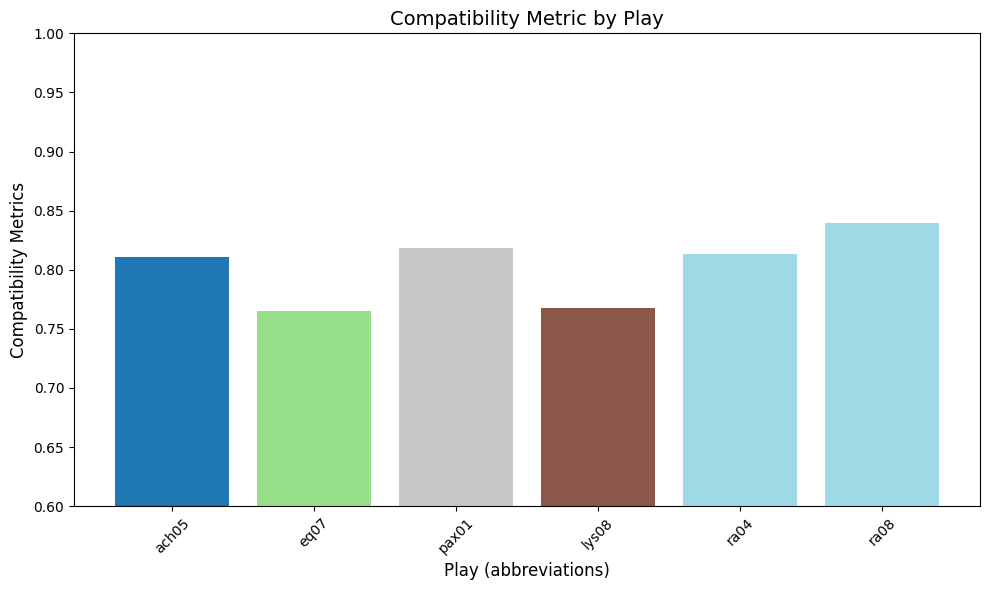

In [12]:
from src.stats_comp import compatibility_canticum, compatibility_ratios_to_stats, compatibility_strophicity
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_strophicity, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

antistrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="antistrophic"))
polystrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="polystrophic"))
print(f'Antistrophic compatibility: {antistrophic_stat}')
print(f'Polystrophic compatibility: {polystrophic_stat}')

polystrophic_ids, antistrophic_ids = get_strophicity(abbreviations)
syll_counts_polystrophic = get_syll_count(polystrophic_ids)
syll_counts_antistrophic = get_syll_count(antistrophic_ids)

polystrophic_dict = {}
for canticum_id in polystrophic_ids:
    polystrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

antistrophic_dict = {}
for canticum_id in antistrophic_ids:
    antistrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

plot_dict(polystrophic_dict, y_start=0.6, y_end=1)


## Accentual Responsion

### Corpus

In [13]:
from src.stats import accentual_responsion_metric_corpus

accentual_responsion_stat = accentual_responsion_metric_corpus('data/compiled')
print(f'Accentual responsion compatibility: {accentual_responsion_stat}')

Accentual responsion compatibility: {'acute': 0.2891070297656745, 'grave': 0.12490869247626005, 'circumflex': 0.17923823749066467, 'acute_circumflex': 0.25639315098954857}


### Play

Note that the $R^2$ metric measures how much of the data is explained by the linear model.
In the social sciences, $R^2$ below $0.2$ is often considered too low.

The only regression model that both keeps its shape and an $R^2 > 0.3$ when "pl" is excluded is the convex model for the circumflex. 


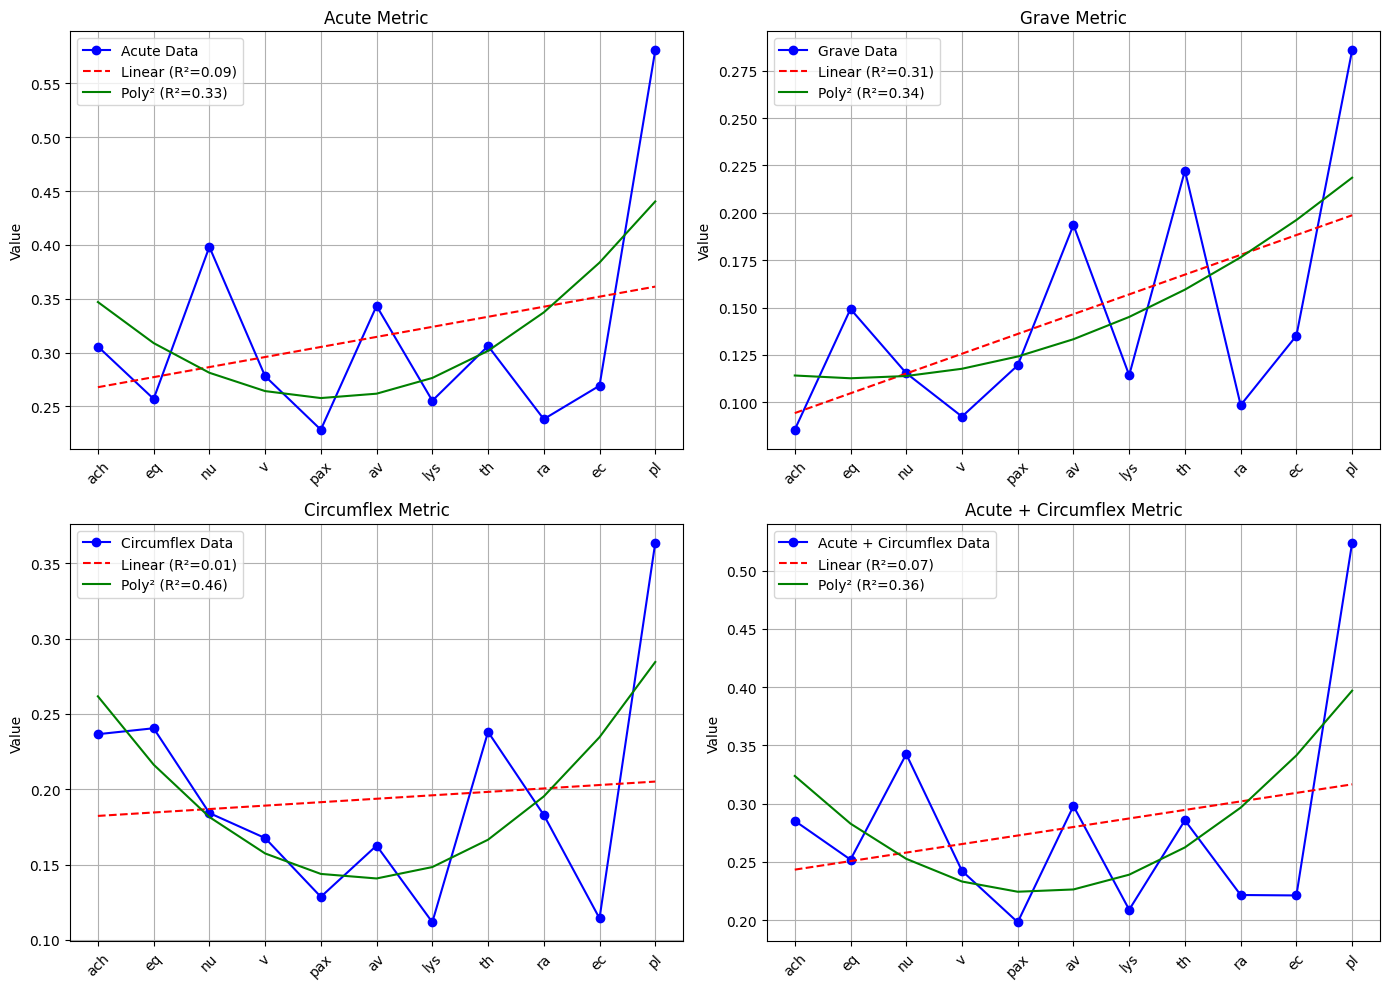

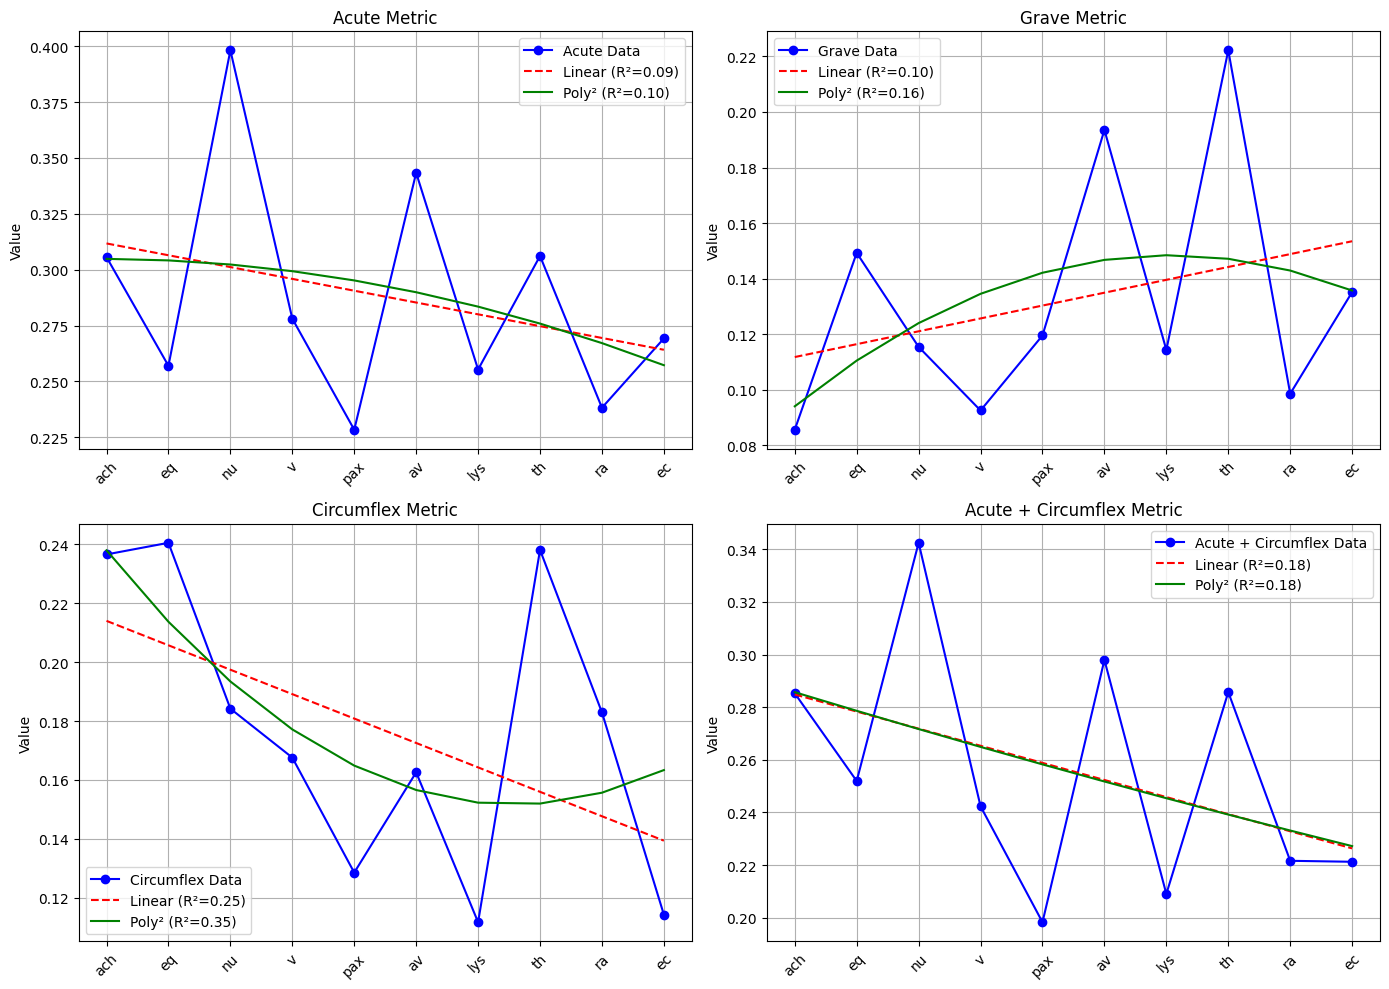

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import r2_score

from src.stats import accentual_responsion_metric_play
from src.utils.utils import abbreviations

abbreviations_no_pl = [abbrev for abbrev in abbreviations if abbrev != 'pl']

def plot_accents(abbreviations):
    play_stat_dictionary = {}
    for play in abbreviations:
        xml_file = f'data/compiled/responsion_{play}_compiled.xml'
        play_stat = accentual_responsion_metric_play(xml_file)
        play_stat_dictionary[play] = play_stat

    data = play_stat_dictionary

    metrics = ['acute', 'grave', 'circumflex', 'acute_circumflex']
    titles = ['Acute', 'Grave', 'Circumflex', 'Acute + Circumflex']

    x_labels = list(data.keys())
    x_numeric = np.arange(len(x_labels))

    # Set up 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        y_values = [data[key][metric] for key in x_labels]
        
        # Linear regression
        slope, intercept, r_value, _, _ = linregress(x_numeric, y_values)
        linear_fit = slope * x_numeric + intercept
        r2_linear = r_value ** 2
        
        # Polynomial (2nd degree) regression
        poly_coeffs = np.polyfit(x_numeric, y_values, deg=2)
        poly_fit = np.polyval(poly_coeffs, x_numeric)
        r2_poly = r2_score(y_values, poly_fit)

        ax = axes[i]
        ax.plot(x_numeric, y_values, 'bo-', label=f'{titles[i]} Data')
        ax.plot(x_numeric, linear_fit, 'r--', label=f'Linear (R²={r2_linear:.2f})')
        ax.plot(x_numeric, poly_fit, 'g-', label=f'Poly² (R²={r2_poly:.2f})')

        ax.set_title(f'{titles[i]} Metric')
        ax.set_xticks(x_numeric)
        ax.set_xticklabels(x_labels, rotation=45)
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_accents(abbreviations)
plot_accents(abbreviations_no_pl)

### Canticum

To get an individual song, use the following:

In [15]:
from src.stats import accentual_responsion_metric_canticum

responsion_metric_ach = accentual_responsion_metric_canticum(f'data/compiled/responsion_ach_compiled.xml', 'ach01')

print(f'Accentual responsion metric for Acharnians: {responsion_metric_ach}')

Accentual responsion metric for Acharnians: {'acute': 0.2903225806451613, 'grave': 0.14814814814814814, 'circumflex': 0.25, 'acute_circumflex': 0.2765957446808511}


Or to tabulate all of them, and make some nice plots:

Number of cantica: 78
| Canticum   | Acute           | Grave          | Circumflex     | Acute + Circumflex   |
|------------|-----------------|----------------|----------------|----------------------|
| ach01      | 18 / 62 = 0.29  | 4 / 27 = 0.15  | 8 / 32 = 0.25  | 26 / 94 = 0.28       |
| ach02      | 18 / 56 = 0.32  | 4 / 19 = 0.21  | 4 / 19 = 0.21  | 22 / 75 = 0.29       |
| ach03      | 12 / 31 = 0.39  | 0 / 11 = 0.00  | 6 / 12 = 0.50  | 18 / 43 = 0.42       |
| ach04      | 10 / 41 = 0.24  | 0 / 25 = 0.00  | 8 / 18 = 0.44  | 18 / 59 = 0.31       |
| ach05      | 0 / 28 = 0.00   | 0 / 12 = 0.00  | 0 / 16 = 0.00  | 0 / 44 = 0.00        |
| ach06      | 24 / 49 = 0.49  | 4 / 17 = 0.24  | 2 / 17 = 0.12  | 26 / 66 = 0.39       |
| ach07      | 26 / 101 = 0.26 | 4 / 44 = 0.09  | 10 / 33 = 0.30 | 36 / 134 = 0.27      |
| ach08      | 12 / 27 = 0.44  | 0 / 15 = 0.00  | 4 / 24 = 0.17  | 16 / 51 = 0.31       |
| ach09      | 16 / 50 = 0.32  | 0 / 17 = 0.00  | 2 / 15 = 0.13  | 18 / 65 = 0

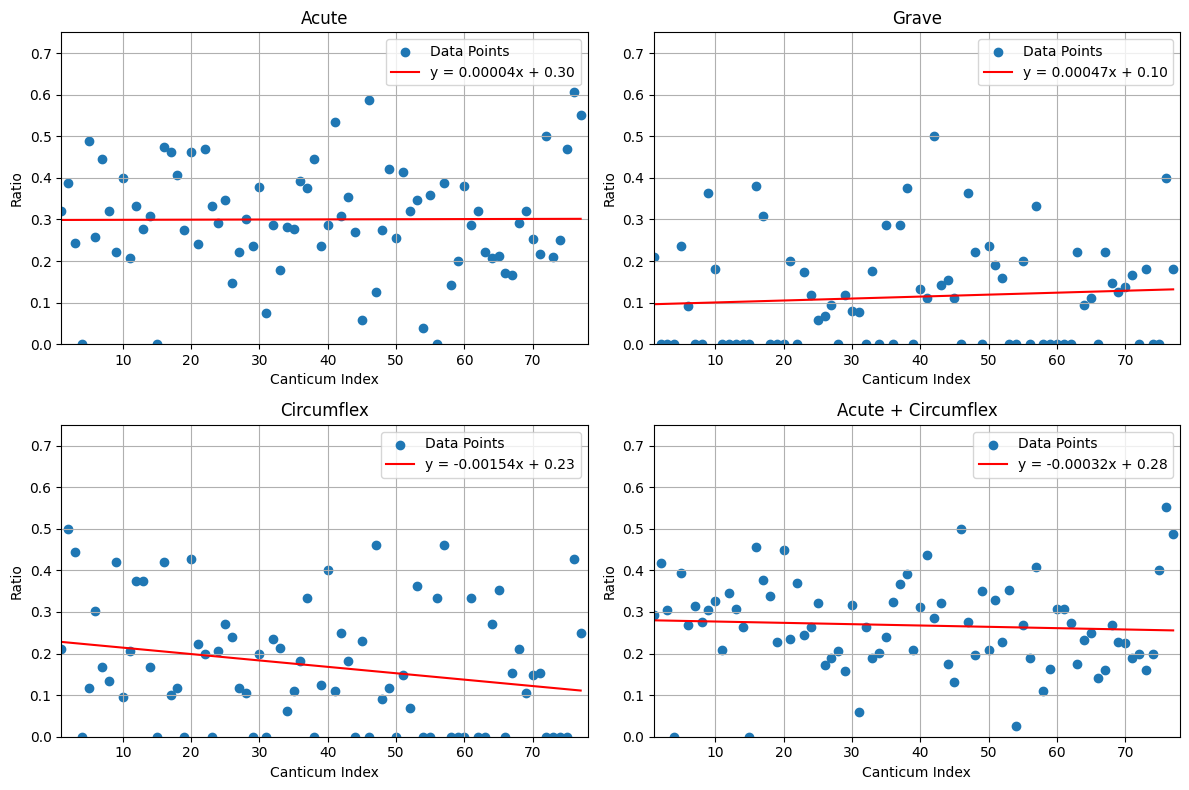

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lxml import etree
from tabulate import tabulate
from src.stats import accentually_responding_syllables_of_strophes_polystrophic, count_all_accents_canticum
from src.utils.utils import abbreviations, get_canticum_ids

def color_ratio(value):
    formatted = f"{value:.2f}"
    return f"\033[92m{formatted}\033[0m" if value > 0 else f"\033[91m{formatted}\033[0m"

canticum_ids = get_canticum_ids(abbreviations)
print(f"Number of cantica: {len(canticum_ids)}")
table_data = []

acute_ratios = []
grave_ratios = []
circumflex_ratios = []
pitch_ratios = []
labels = []

for idx, canticum in enumerate(canticum_ids):
    infix = canticum[:-2]
    xml_file = f"data/compiled/responsion_{infix}_compiled.xml"
    tree = etree.parse(xml_file)

    strophes = tree.xpath(f'//*[self::strophe or self::antistrophe][@responsion="{canticum}"]')
    accent_maps = accentually_responding_syllables_of_strophes_polystrophic(*strophes)

    total_accent_sums = count_all_accents_canticum(tree, canticum)
    accent_responsion_counts = {
        'acute': sum(len(d) for d in accent_maps[0]),
        'grave': sum(len(d) for d in accent_maps[1]),
        'circumflex': sum(len(d) for d in accent_maps[2])
    }

    acute_total = total_accent_sums['acute']
    grave_total = total_accent_sums['grave']
    circumflex_total = total_accent_sums['circumflex']

    acute_stat = accent_responsion_counts['acute'] / acute_total if acute_total > 0 else 0
    grave_stat = accent_responsion_counts['grave'] / grave_total if grave_total > 0 else 0
    circumflex_stat = accent_responsion_counts['circumflex'] / circumflex_total if circumflex_total > 0 else 0

    pitch_numerator = accent_responsion_counts['acute'] + accent_responsion_counts['circumflex']
    pitch_denominator = acute_total + circumflex_total
    pitch_stat = pitch_numerator / pitch_denominator if pitch_denominator > 0 else 0

    table_data.append([
        canticum,
        f"{accent_responsion_counts['acute']} / {acute_total} = {color_ratio(acute_stat)}",
        f"{accent_responsion_counts['grave']} / {grave_total} = {color_ratio(grave_stat)}",
        f"{accent_responsion_counts['circumflex']} / {circumflex_total} = {color_ratio(circumflex_stat)}",
        f"{pitch_numerator} / {pitch_denominator} = {color_ratio(pitch_stat)}"
    ])

    labels.append(canticum)
    acute_ratios.append(acute_stat)
    grave_ratios.append(grave_stat)
    circumflex_ratios.append(circumflex_stat)
    pitch_ratios.append(pitch_stat)

# Print the table
print(tabulate(
    table_data,
    headers=["Canticum", "Acute", "Grave", "Circumflex", "Acute + Circumflex"],
    tablefmt="github"
))

# Create plots with regression lines
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
titles = ["Acute", "Grave", "Circumflex", "Acute + Circumflex"]
data_lists = [acute_ratios, grave_ratios, circumflex_ratios, pitch_ratios]

x = list(range(len(labels)))

for i, (title, y_data) in enumerate(zip(titles, data_lists)):
    axs[i].scatter(x, y_data, label='Data Points')
    slope, intercept, r_value, _, _ = linregress(x, y_data)
    y_fit = [slope * xi + intercept for xi in x]
    axs[i].plot(x, y_fit, color='red', label=f"y = {slope:.5f}x + {intercept:.2f}")
    axs[i].set_title(title)
    axs[i].set_xlabel("Canticum Index")
    axs[i].set_ylabel("Ratio")
    axs[i].set_xlim(1, 78)
    axs[i].set_ylim(0, 0.75)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

## Barys Responsion

The metric we're going for here is 

>**$n*β^r/β$** 

where $β^r$ is the number of barys + oxys responsion groups, $β$ is the number of all barys + oxys accents in all strophes and $n$ is the number of strophes. 

### Corpus

In [1]:
from src.stats_barys import barys_oxys_metric_corpus

corpus_dict = barys_oxys_metric_corpus('data/compiled', exclude_substr='baseline')

for key, value in corpus_dict.items():
    print(f'\t{key}: {value}')

Total barys matches in corpus: 1462, Oxys matches: 208
	barys_metric: 0.43811807012286486
	oxys_metric: 0.1783876500857633
	barys_oxys_metric: 0.3708638685320897


### Play

In [17]:
from src.stats_barys import barys_oxys_metric_play
from src.utils.utils import abbreviations

play_dict = {}
for play in abbreviations: 
    play_dict[play] = barys_oxys_metric_play(play)
    print(f'\t{play}:')
    for key, value in play_dict[play].items():
        print(f'\t\t{key}: {value}')

print(play_dict)


Total Barys: 443, Total Oxys: 194, Total Barys+Oxys: 637
Barys Matches: 192, Oxys Matches: 36
	ach:
		barys_metric: 0.43340857787810383
		oxys_metric: 0.18556701030927836
		barys_oxys_metric: 0.3579277864992151
Total Barys: 409, Total Oxys: 106, Total Barys+Oxys: 515
Barys Matches: 188, Oxys Matches: 14
	eq:
		barys_metric: 0.45965770171149145
		oxys_metric: 0.1320754716981132
		barys_oxys_metric: 0.39223300970873787
Total Barys: 211, Total Oxys: 81, Total Barys+Oxys: 292
Barys Matches: 108, Oxys Matches: 34
	nu:
		barys_metric: 0.5118483412322274
		oxys_metric: 0.41975308641975306
		barys_oxys_metric: 0.4863013698630137
Total Barys: 430, Total Oxys: 121, Total Barys+Oxys: 551
Barys Matches: 196, Oxys Matches: 20
	v:
		barys_metric: 0.4558139534883721
		oxys_metric: 0.1652892561983471
		barys_oxys_metric: 0.39201451905626133
Total Barys: 347, Total Oxys: 116, Total Barys+Oxys: 463
Barys Matches: 161, Oxys Matches: 6
	pax:
		barys_metric: 0.46397694524495675
		oxys_metric: 0.05172413793

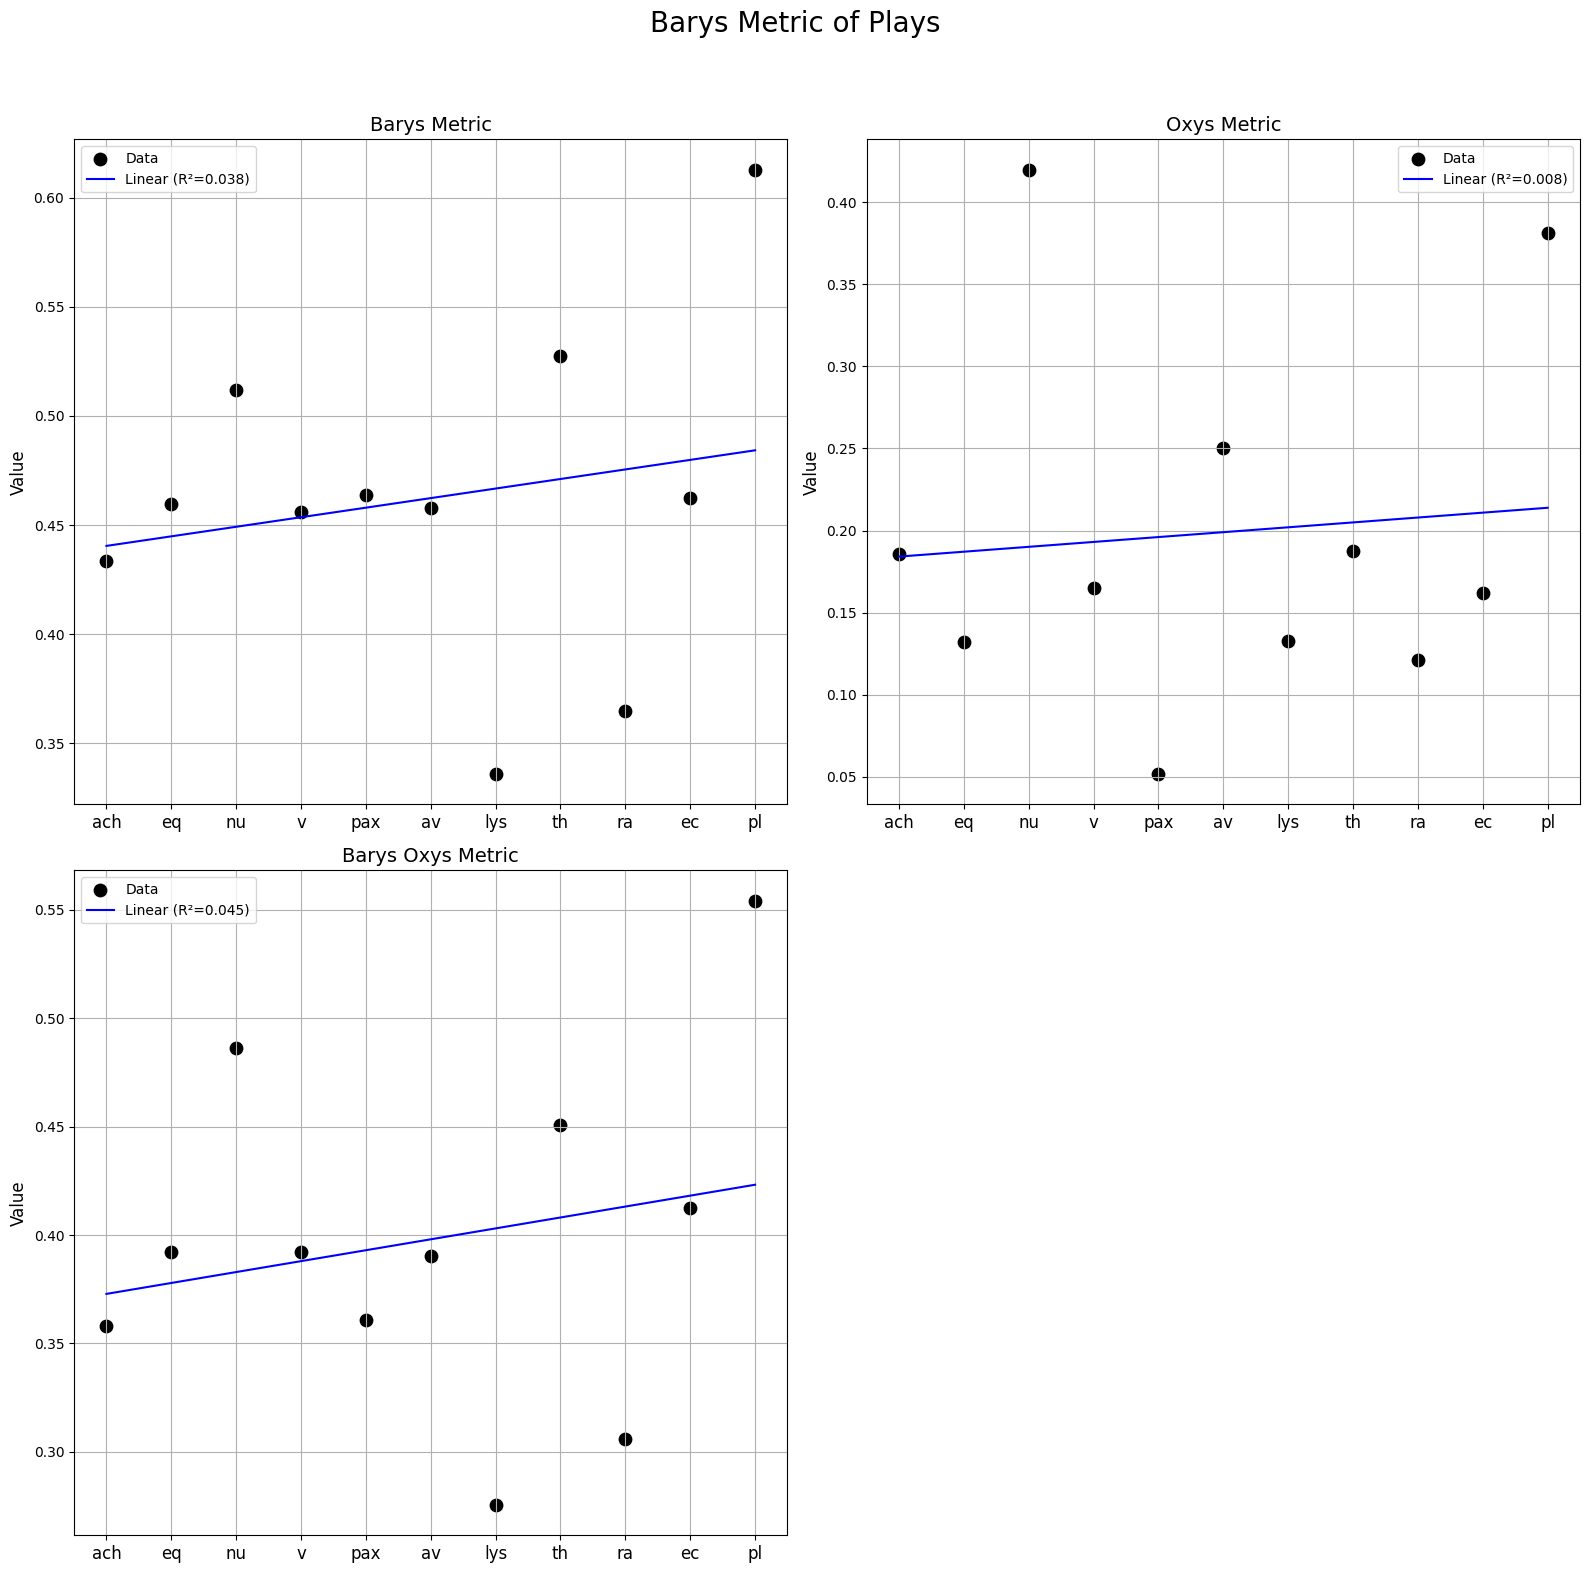

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = play_dict

metrics = ['barys_metric', 'oxys_metric', 'barys_oxys_metric']
keys = list(data.keys())
x = np.arange(len(keys))

# Set figure size for a square layout
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    y = np.array([data[k][metric] for k in keys])

    # Scatter points
    ax.scatter(x, y, color='black', label='Data', s=80)

    # Linear regression
    X = x.reshape(-1, 1)
    linreg = LinearRegression().fit(X, y)
    y_pred = linreg.predict(X)
    r2 = r2_score(y, y_pred)
    ax.plot(x, y_pred, color='blue', label=f'Linear (R²={r2:.3f})')

    # Aesthetics
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(keys, fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

# Turn off the unused subplot
axs[3].axis('off')

# Main title
plt.suptitle("Barys Metric of Plays", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Canticum

Here's a detailed print of all match groups of all cantica:

In [19]:
from lxml import etree

from src.stats_barys import barys_accentually_responding_syllables_of_strophes_polystrophic, count_all_barys_oxys_canticum

from src.utils.utils import abbreviations, get_canticum_ids, polystrophic_cantica

def barys_detailed_print(infix):

    input_file = f"data/compiled/responsion_{infix}_compiled.xml"
    tree = etree.parse(input_file)

    canticum_ids = get_canticum_ids([infix])

    for responsion in canticum_ids:
        print(f"\nCanticum: {responsion}")
            
        all_barys_oxys_canticum_dict = count_all_barys_oxys_canticum(tree, responsion)
        print(all_barys_oxys_canticum_dict)
        sum_barys = all_barys_oxys_canticum_dict['barys']
        sum_oxys = all_barys_oxys_canticum_dict['oxys']
        sum_barys_oxys = sum_barys + sum_oxys

        strophes = tree.xpath(f'//strophe[@responsion="{responsion}"] | //antistrophe[@responsion="{responsion}"]') # bug fix (was only strophe)
        n = len(strophes)

        barys_oxys_results = barys_accentually_responding_syllables_of_strophes_polystrophic(*strophes)

        if not barys_oxys_results:
            print("No valid barys/oxys matches found.\n")
            continue  # Skip to next responsion if no results

        barys_list, oxys_list = barys_oxys_results

        print(f"Barys matches: {len(barys_list)}")
        print(f"Oxys matches:  {len(oxys_list)}\n")

        barys_metric = (n * len(barys_list)) / sum_barys if sum_barys > 0 else 0
        oxys_metric = (n * len(oxys_list)) / sum_oxys if sum_oxys > 0 else 0
        barys_oxys_metric = (n * (len(barys_list) + len(oxys_list))) / sum_barys_oxys if sum_barys_oxys > 0 else 0

        print(f"Barys metric: {barys_metric:.3f}")
        print(f"Oxys metric:  {oxys_metric:.3f}")
        print(f"Barys + Oxys metric: {barys_oxys_metric:.3f}\n")

        if responsion in polystrophic_cantica:
            if barys_list:
                print("--- BARYS MATCHES ---")
                for match_idx, match_set in enumerate(barys_list, start=1):
                    print(f"  Match #{match_idx}:")
                    for (line_id, unit_ord), text in match_set.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

            if oxys_list:
                print("--- OXYS MATCHES ---")
                for match_idx, match_set in enumerate(oxys_list, start=1):
                    print(f"  Match #{match_idx}:")
                    for (line_id, unit_ord), text in match_set.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()
            
        else: 
            if barys_list:
                print("--- BARYS MATCHES ---")
                for i, pair_dict in enumerate(barys_list, start=1):
                    print(f"  Pair #{i}:")
                    for (line_id, unit_ord), text in pair_dict.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

            if oxys_list:
                print("--- OXYS MATCHES ---")
                for i, pair_dict in enumerate(oxys_list, start=1):
                    print(f"  Pair #{i}:")
                    for (line_id, unit_ord), text in pair_dict.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

for infix in abbreviations:
    barys_detailed_print(infix)


Canticum: ach01
{'barys': 67, 'oxys': 26}
Barys matches: 15
Oxys matches:  2

Barys metric: 0.448
Oxys metric:  0.154
Barys + Oxys metric: 0.366

--- BARYS MATCHES ---
  Pair #1:
    (line 204, ord=1) => "Τῇ"
    (line 219, ord=1) => "Νῦν"

  Pair #2:
    (line 205, ord=8) => "πάντων"
    (line 220, ord=8) => "τείδῃ"

  Pair #3:
    (line 205, ord=11) => "πόλει"
    (line 220, ord=11) => "κέλος"

  Pair #4:
    (line 206, ord=7) => "τοῦ"
    (line 221, ord=7) => "τέος"

  Pair #5:
    (line 207, ord=3) => "οἶ"
    (line 222, ord=3) => "δέπερ"

  Pair #6:
    (line 207, ord=5) => "δ' ὅποι"
    (line 222, ord=5) => "γέρον"

  Pair #7:
    (line 207, ord=15) => "φέρων"
    (line 222, ord=15) => "νέας"

  Pair #8:
    (line 208-209, ord=3) => "πέφευγ"
    (line 223-224, ord=3) => "ς, ὦ Ζ"

  Pair #9:
    (line 210-211, ord=4) => "ς. Οἴμοι"
    (line 225, ord=4) => "τοῖ"

  Pair #10:
    (line 210-211, ord=7) => "τῶν"
    (line 225, ord=7) => "θροῖ"

  Pair #11:
    (line 211-212, ord=4) =

{'ach01': {'barys_metric': 0.44776119402985076, 'oxys_metric': 0.15384615384615385, 'barys_oxys_metric': 0.3655913978494624}, 'ach02': {'barys_metric': 0.43137254901960786, 'oxys_metric': 0.37037037037037035, 'barys_oxys_metric': 0.41025641025641024}, 'ach03': {'barys_metric': 0.6428571428571429, 'oxys_metric': 0.15384615384615385, 'barys_oxys_metric': 0.4878048780487805}, 'ach04': {'barys_metric': 0.5882352941176471, 'oxys_metric': 0.24, 'barys_oxys_metric': 0.4406779661016949}, 'ach05': {'barys_metric': 0.10256410256410256, 'oxys_metric': 0.0, 'barys_oxys_metric': 0.08888888888888889}, 'ach06': {'barys_metric': 0.5263157894736842, 'oxys_metric': 0.2222222222222222, 'barys_oxys_metric': 0.48484848484848486}, 'ach07': {'barys_metric': 0.42857142857142855, 'oxys_metric': 0.17391304347826086, 'barys_oxys_metric': 0.302158273381295}, 'ach08': {'barys_metric': 0.43478260869565216, 'oxys_metric': 0.0, 'barys_oxys_metric': 0.4}, 'ach09': {'barys_metric': 0.35294117647058826, 'oxys_metric': 0

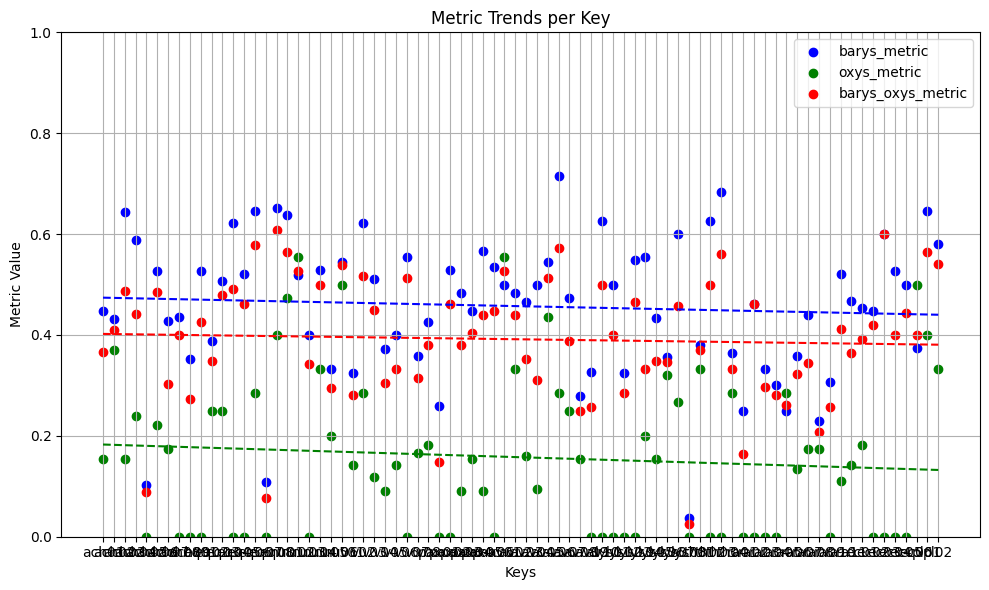

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

from src.stats_barys import barys_oxys_metric_canticum
from src.utils.utils import abbreviations, get_canticum_ids

canticum_ids = get_canticum_ids(abbreviations)

canticum_dict = {}
for canticum in canticum_ids:
    canticum_dict[canticum] = barys_oxys_metric_canticum(canticum) 

print(canticum_dict)

data = canticum_dict

# Prepare
x_labels = list(data.keys())
x_numeric = np.arange(len(x_labels))  # [0, 1, 2, ...]

# Extract y-values
barys = [data[k]['barys_metric'] for k in x_labels]
oxys = [data[k]['oxys_metric'] for k in x_labels]
barys_oxys = [data[k]['barys_oxys_metric'] for k in x_labels]

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x_numeric, barys, color='blue', label='barys_metric')
plt.scatter(x_numeric, oxys, color='green', label='oxys_metric')
plt.scatter(x_numeric, barys_oxys, color='red', label='barys_oxys_metric')

# Linear regression function
def plot_regression(x, y, color):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    plt.plot(x, y_pred, color=color, linestyle='--')

# Fit and plot regression lines
plot_regression(x_numeric, np.array(barys), 'blue')
plot_regression(x_numeric, np.array(oxys), 'green')
plot_regression(x_numeric, np.array(barys_oxys), 'red')

# Finalize plot
plt.xticks(ticks=x_numeric, labels=x_labels)
plt.ylim(0, 1)
plt.xlabel("Keys")
plt.ylabel("Metric Value")
plt.title("Metric Trends per Key")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## All 3 Metrics

### Corpus

#### Trimeter 2-strophe baseline

In [24]:
from src.utils.stats_combined import all_three_metrics_corpus

trimeter_2strophe_baseline_comp = 0.7929447852760736
trimeter_2strophe_baseline_acc = 0.19444444444444445
trimeter_2strophe_baseline_barys = 0.3105022831050228

all_three_metrics = all_three_metrics_corpus('data/compiled')

print(f'All three metrics corpus:')
for key, value in all_three_metrics.items():
    print(f'\t{key}: {value}')

Total barys matches in corpus: 1462, Oxys matches: 208
All three metrics corpus:
	acute_circumflex_responsion: 0.25639315098954857
	barys_responsion: 0.43811807012286486
	contour_compatibility: 0.8205128205128205


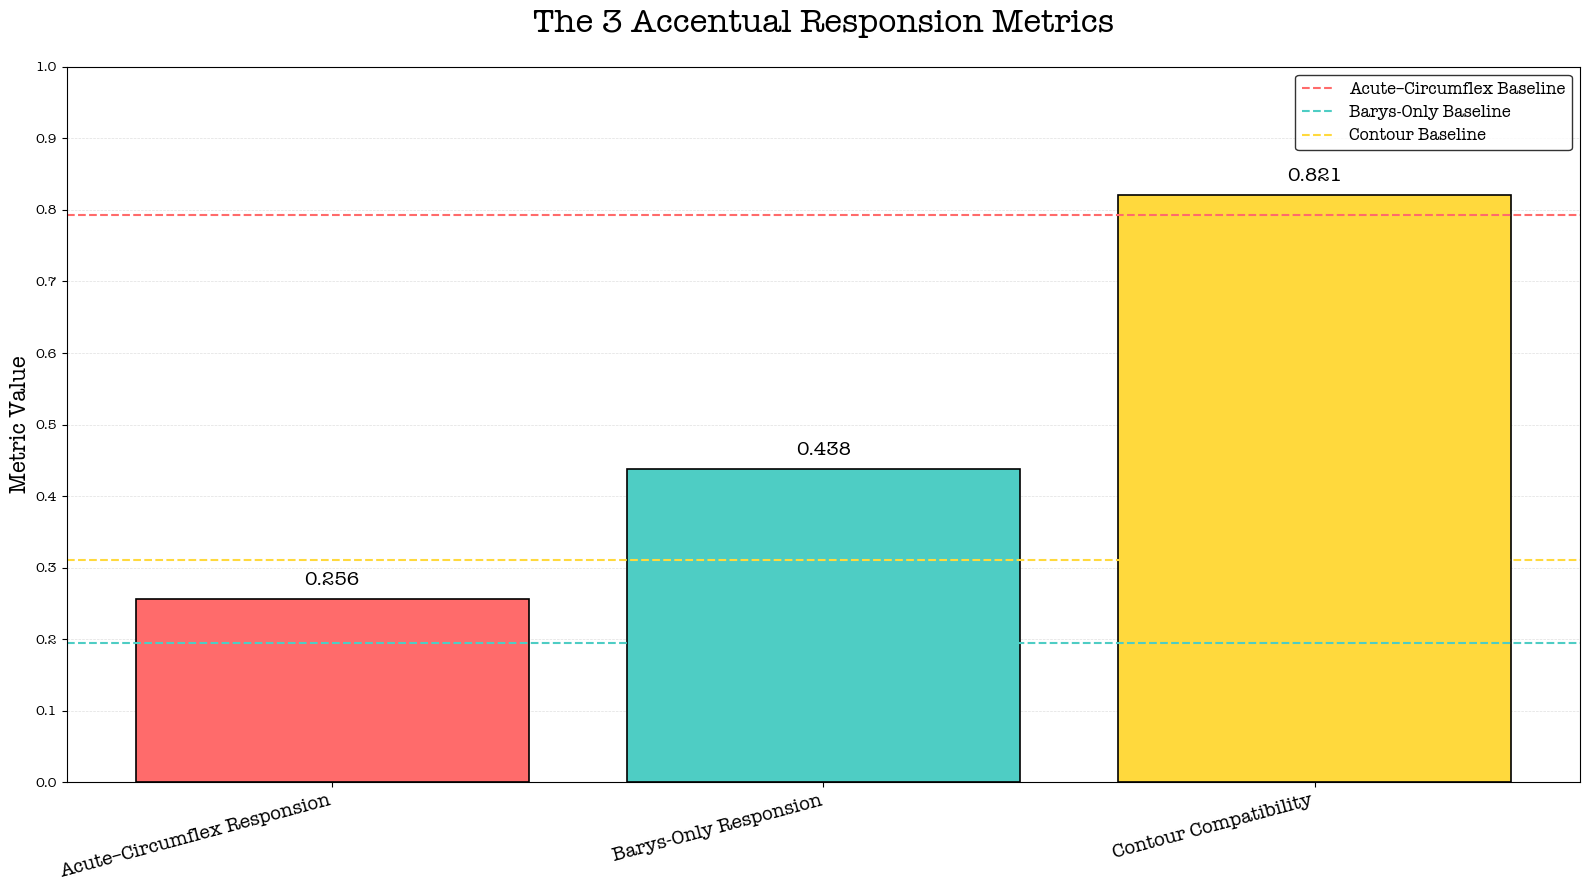

In [25]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'American Typewriter'})

# Data
value_acc = data['acute_circumflex_responsion']
value_barys = data['barys_responsion']
value_comp = data['contour_compatibility']

baseline_acc = trimeter_2strophe_baseline_comp
baseline_barys = trimeter_2strophe_baseline_acc
baseline_comp = trimeter_2strophe_baseline_barys

# Labels and colors
labels = [
    'Acute–Circumflex Responsion',
    'Barys-Only Responsion',
    'Contour Compatibility'
]
values = [value_acc, value_barys, value_comp]
baselines = [baseline_acc, baseline_barys, baseline_comp]
colors = ['#FF6B6B', '#4ECDC4', '#FFD93D']

# Create true 16:9 figure
fig, ax = plt.subplots(figsize=(16, 9), facecolor='white')
ax.set_facecolor('white')

# Plot bars
bars = ax.bar(labels, values, color=colors, edgecolor='black', linewidth=1.2)

# Add horizontal baselines
ax.axhline(baseline_acc, color='#FF6B6B', linestyle='--', linewidth=1.5, label='Acute–Circumflex Baseline')
ax.axhline(baseline_barys, color='#4ECDC4', linestyle='--', linewidth=1.5, label='Barys-Only Baseline')
ax.axhline(baseline_comp, color='#FFD93D', linestyle='--', linewidth=1.5, label='Contour Baseline')

# Annotate bars
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.015,
            f"{val:.3f}", ha='center', va='bottom',
            color='black', fontsize=14, fontweight='bold')

# Titles and labels
ax.set_title("The 3 Accentual Responsion Metrics", fontsize=24, pad=25)
ax.set_ylabel("Metric Value", fontsize=16)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=15, ha='right', fontsize=14)
ax.tick_params(axis='y', colors='black')
ax.set_yticks([i/10 for i in range(0, 11)])
ax.set_yticklabels([f"{y:.1f}" for y in ax.get_yticks()], color='black')

# Grid and legend
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
ax.set_axisbelow(True)
ax.legend(facecolor='white', edgecolor='black', frameon=True, fontsize=12)

plt.tight_layout()
plt.show()

Let's try normalizing the baselines:

/var/folders/z5/96yps3t10c7c28x67t7n83d80000gn/T/ipykernel_1906/3967356101.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=15, ha='right', color='white', fontsize=12)


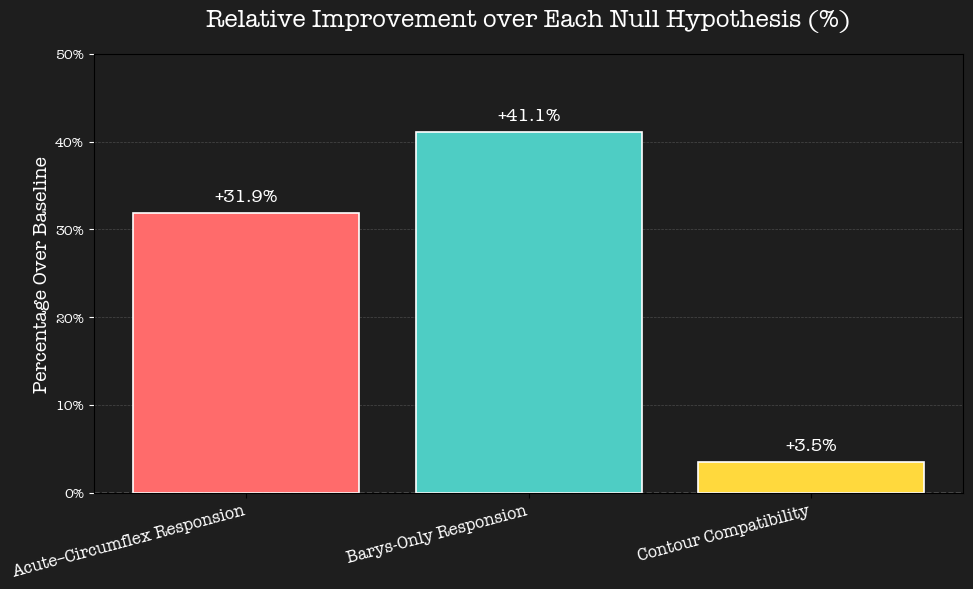

In [19]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'American Typewriter'})

# Values
value_acc = data['acute_circumflex_responsion']
value_barys = data['barys_responsion']
value_comp = data['contour_compatibility']

# Baselines
baseline_acc = 0.19444444444444445
baseline_barys = 0.3105022831050228
baseline_comp = 0.7929447852760736

# % over baseline
effect_acc = (value_acc - baseline_acc) / baseline_acc
effect_barys = (value_barys - baseline_barys) / baseline_barys
effect_comp = (value_comp - baseline_comp) / baseline_comp

# Plot data
labels = [
    'Acute–Circumflex Responsion',
    'Barys-Only Responsion',
    'Contour Compatibility'
]
effects = [effect_acc, effect_barys, effect_comp]
colors = ['#FF6B6B', '#4ECDC4', '#FFD93D']  # red, teal, yellow for pop

# Figure setup
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#1e1e1e')
ax.set_facecolor('#1e1e1e')

bars = ax.bar(labels, effects, color=colors, edgecolor='white', linewidth=1.2)

# Annotate bars
for bar, val in zip(bars, effects):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.01,
            f"+{val*100:.1f}%", ha='center', va='bottom',
            color='white', fontsize=13, fontweight='bold')

# Add baseline line at 0
ax.axhline(0, color='white', linestyle='--', linewidth=1)

# Styling
ax.set_title("Relative Improvement over Each Null Hypothesis (%)", color='white', fontsize=18, pad=20)
ax.set_ylabel("Percentage Over Baseline", color='white', fontsize=14)
ax.set_xticklabels(labels, rotation=15, ha='right', color='white', fontsize=12)
ax.tick_params(axis='y', colors='white')
ax.set_yticks([i/10 for i in range(0, 6)])
ax.set_yticklabels([f"{int(y*100)}%" for y in ax.get_yticks()], color='white')

# Optional gridlines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

#### Tetrameter 2-strophe baseline

In [ ]:
from src.utils.stats_combined import all_three_metrics_corpus

trimeter_2strophe_baseline_comp = 0.7929447852760736
trimeter_2strophe_baseline_acc = 0.19444444444444445
trimeter_2strophe_baseline_barys = 0.3105022831050228

all_three_metrics = all_three_metrics_corpus('data/compiled')

print(f'All three metrics corpus:')
for key, value in all_three_metrics.items():
    print(f'\t{key}: {value}')

## Play

Let's compare the three most important statistics: acute-circumflex responsion, barys responsion and contour compatibility, while leveraging the relevant baselines. 

In [8]:
from src.utils.stats_combined import all_three_metrics_play
from src.utils.utils import abbreviations

play_dict = {}
for play in abbreviations:
    print(play)
    play_dict[play] = all_three_metrics_play(play)
    for key, value in all_three_metrics_play(play).items():
        print(f'\t{key}: {value}')

print(play_dict)

ach
	acute_circumflex_responsion: 0.28526148969889065
	barys_responsion: 0.43340857787810383
	contour_compatibility: 0.8179916317991632
eq
	acute_circumflex_responsion: 0.25193798449612403
	barys_responsion: 0.45965770171149145
	contour_compatibility: 0.8139367816091954
nu
	acute_circumflex_responsion: 0.3424657534246575
	barys_responsion: 0.5118483412322274
	contour_compatibility: 0.82
v
	acute_circumflex_responsion: 0.2423146473779385
	barys_responsion: 0.4558139534883721
	contour_compatibility: 0.817450495049505
pax
	acute_circumflex_responsion: 0.19827586206896552
	barys_responsion: 0.46397694524495675
	contour_compatibility: 0.82531328320802
av
	acute_circumflex_responsion: 0.2979591836734694
	barys_responsion: 0.4578313253012048
	contour_compatibility: 0.817295188556567
lys
	acute_circumflex_responsion: 0.209009009009009
	barys_responsion: 0.33587786259541985
	contour_compatibility: 0.8303571428571429
th
	acute_circumflex_responsion: 0.2857142857142857
	barys_responsion: 0.527272

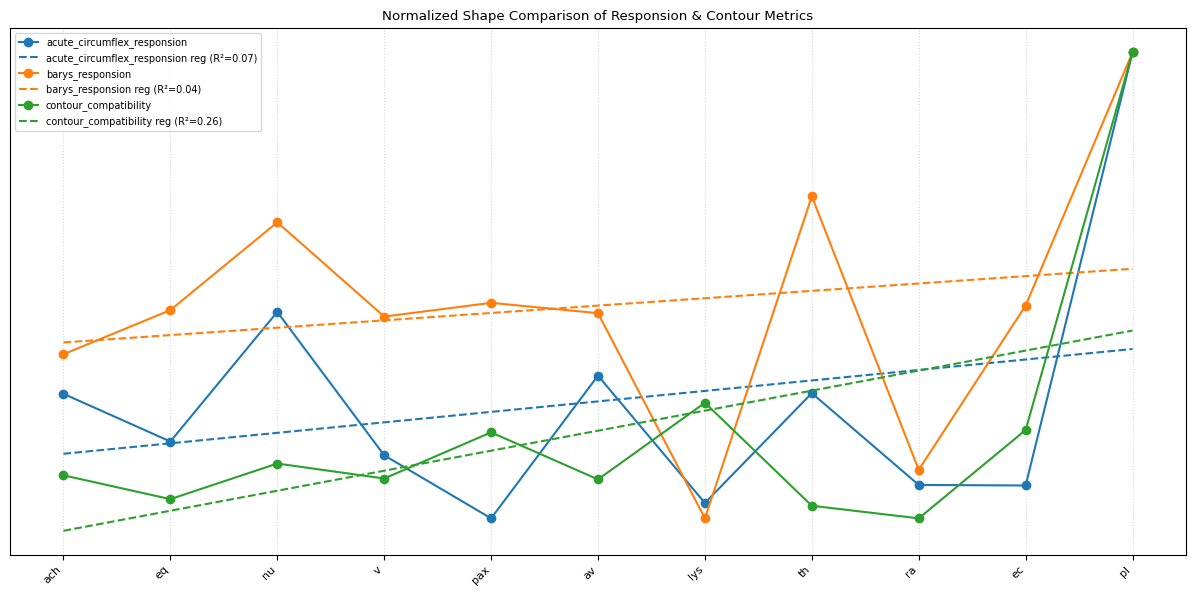

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = play_dict

# X-axis labels
x_labels = list(data.keys())
x = np.arange(len(x_labels))

metrics = ['acute_circumflex_responsion', 'barys_responsion', 'contour_compatibility']
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 8})

for metric, color in zip(metrics, colors):
    values = np.array([data[k][metric] for k in x_labels])
    min_val, max_val = values.min(), values.max()
    norm_values = (values - min_val) / (max_val - min_val) if max_val != min_val else np.zeros_like(values)

    plt.plot(x, norm_values, marker='o', color=color, label=metric)

    model = LinearRegression().fit(x.reshape(-1, 1), norm_values)
    trend = model.predict(x.reshape(-1, 1))
    r2 = model.score(x.reshape(-1, 1), norm_values)

    plt.plot(x, trend, linestyle='--', color=color, label=f"{metric} reg (R²={r2:.2f})")

# Remove y-axis
plt.gca().set_yticks([])
plt.gca().set_ylabel('')  # No label

# Final layout
plt.xticks(x, x_labels, rotation=45, ha='right')
plt.title("Normalized Shape Comparison of Responsion & Contour Metrics")
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [1]:
from src.utils.stats_combined import all_three_metrics_play
from src.utils.utils import abbreviations

play_dict_no_pl = {}
for play in filter(lambda x: x != "pl", abbreviations):
    play_dict_no_pl[play] = all_three_metrics_play(play)

baseline_comp = 0.7929447852760736
baseline_acc = 0.19444444444444445
baseline_barys = 0.3105022831050228


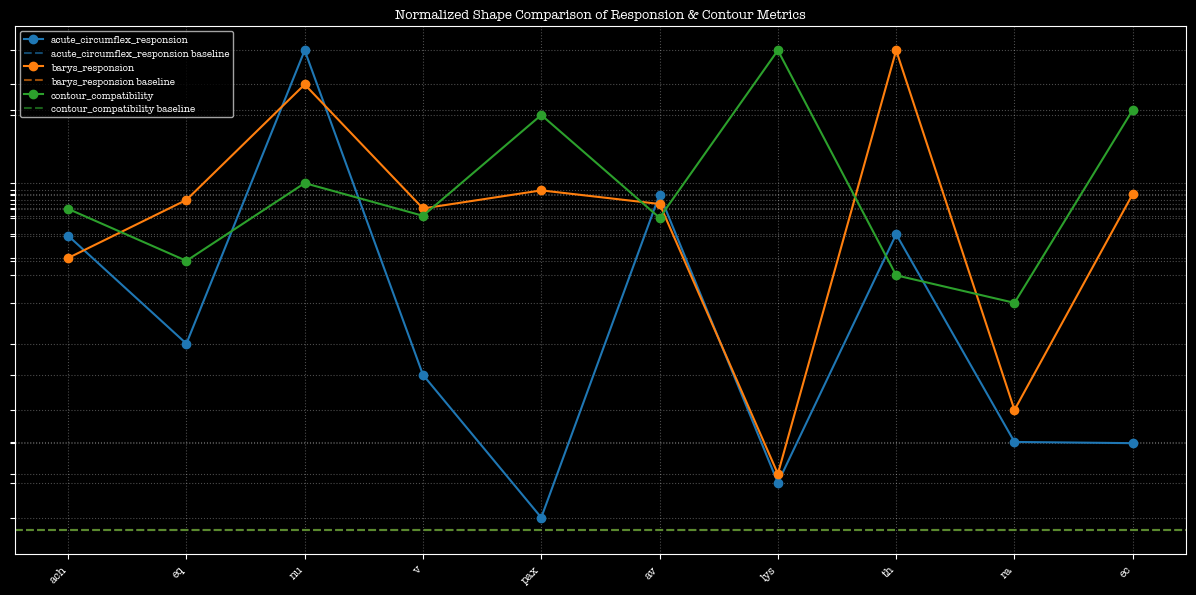

In [5]:
from src.utils.utils import baseline

import matplotlib.pyplot as plt
import numpy as np

# Baseline values
baseline_comp = baseline("comp", "trimeter_2_strophic")
baseline_acc = baseline("acc", "trimeter_2_strophic", "acute_circumflex")
baseline_barys = baseline("barys", "trimeter_2_strophic", "barys_oxys_metric")
print(f'baseline_comp = {baseline_comp}')
print(f'baseline_acc = {baseline_acc}')
print(f'baseline_barys = {baseline_barys}')

plt.rcParams.update({'font.family': 'American Typewriter'})
plt.style.use('dark_background')

data = play_dict_no_pl

# X-axis labels
x_labels = list(data.keys())
x = np.arange(len(x_labels))

metrics = ['acute_circumflex_responsion', 'barys_responsion', 'contour_compatibility']
colors = ['tab:blue', 'tab:orange', 'tab:green']
baselines = [baseline_acc, baseline_barys, baseline_comp]

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 8})

ax = plt.gca()
ax.set_facecolor('black')

# Gather all normalized y-values
all_y_vals = []

for metric, color, base in zip(metrics, colors, baselines):
    values = np.array([data[k][metric] for k in x_labels])

    # Ensure baseline is part of normalization range
    extended = np.append(values, base)
    min_val, max_val = extended.min(), extended.max()
    norm_values = (values - min_val) / (max_val - min_val) if max_val != min_val else np.zeros_like(values)
    norm_baseline = (base - min_val) / (max_val - min_val) if max_val != min_val else 0.0

    all_y_vals.extend(norm_values)

    plt.plot(x, norm_values, marker='o', color=color, label=metric)
    plt.axhline(norm_baseline, linestyle='--', color=color, alpha=0.6, label=f"{metric} baseline")

# Use only unique y-values (rounded) for grid lines
unique_y_vals = sorted(set(np.round(all_y_vals, 4)))
ax.set_yticks(unique_y_vals)
ax.set_yticklabels([''] * len(unique_y_vals))  # Hide y-axis labels

# X-axis and tick settings
plt.xticks(x, x_labels, rotation=45, ha='right', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Title and legend
plt.title("Normalized Shape Comparison of Responsion & Contour Metrics", color='white')
plt.legend(fontsize=7)

# Grid on vertical and horizontal lines
ax.grid(True, axis='y', which='major', linestyle=':', alpha=0.3)
ax.grid(True, axis='x', linestyle=':', alpha=0.3)

# Final layout
plt.tight_layout()
plt.show()

We want to tease out in what way the three metrics differ. Here's a "residual plot" of their differences:

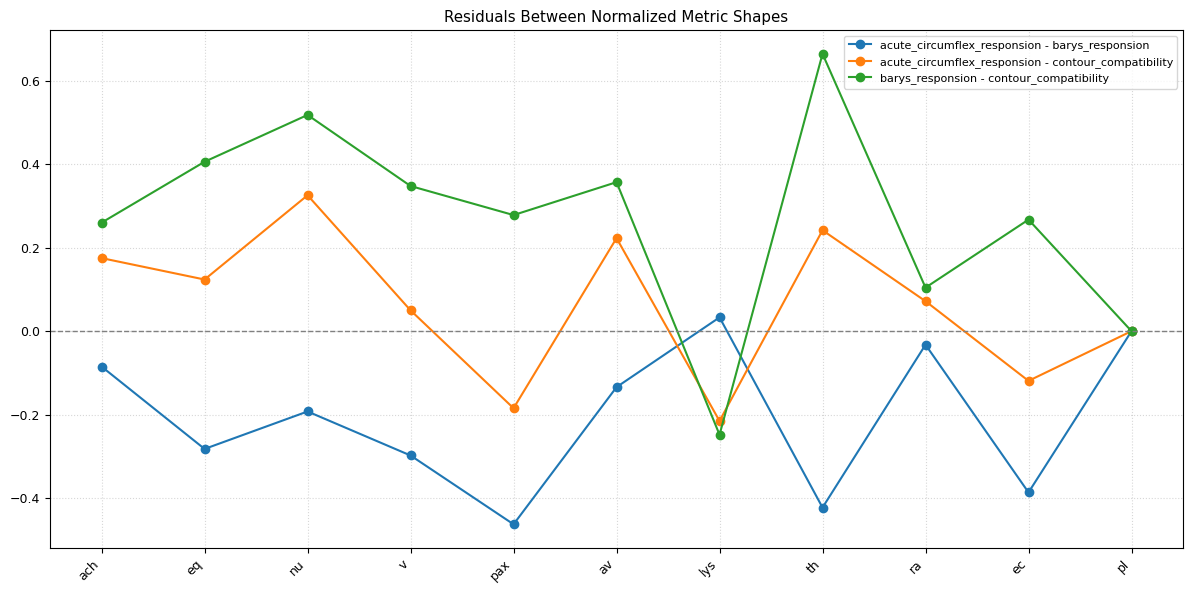

In [11]:
x_labels = list(data.keys())
x = np.arange(len(x_labels))

metrics = ['acute_circumflex_responsion', 'barys_responsion', 'contour_compatibility']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Normalize each metric independently to [0, 1]
normalized = {}
for metric in metrics:
    values = np.array([data[k][metric] for k in x_labels])
    min_val, max_val = values.min(), values.max()
    norm = (values - min_val) / (max_val - min_val) if max_val != min_val else np.zeros_like(values)
    normalized[metric] = norm

# Create residual plots between each pair
from itertools import combinations

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 9})

for i, (m1, m2) in enumerate(combinations(metrics, 2), start=1):
    residual = normalized[m1] - normalized[m2]
    plt.plot(x, residual, marker='o', label=f"{m1} - {m2}")

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(x, x_labels, rotation=45, ha='right')
plt.title("Residuals Between Normalized Metric Shapes")
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

Another interesting measure is the Spearman rank correlation that takes only *rank* (relative positions in the dataset) into consideration: 

In [18]:
from scipy.stats import spearmanr
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data).T

# Extract the three metrics
a = df['acute_circumflex_responsion']
b = df['barys_responsion']
c = df['contour_compatibility']

# Compute Spearman correlations
rho_ab, pval_ab = spearmanr(a, b)
rho_ac, pval_ac = spearmanr(a, c)
rho_bc, pval_bc = spearmanr(b, c)

accentual = "\033[32maccentual\033[0m"
barys = "\033[33mbarys\033[0m"
comp = "\033[34mcomp\033[0m"

# Display results
print(f"Spearman {accentual} vs {barys}: ρ = {rho_ab:.3f}, p = {pval_ab:.3f}")
print(f"Spearman {accentual} vs {comp}: ρ = {rho_ac:.3f}, p = {pval_ac:.3f}")
print(f"Spearman {barys} vs {comp}: ρ = {rho_bc:.3f}, p = {pval_bc:.3f}")

Spearman accentual vs barys: ρ = 0.345, p = 0.328
Spearman accentual vs comp: ρ = -0.442, p = 0.200
Spearman barys vs comp: ρ = -0.055, p = 0.881


## Significance